In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
array = plt.imread('C:/Users/snehi/Downloads/ml udemy/palm_trees.jpg')


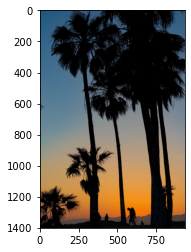

In [59]:
image = plt.imshow(array)

In [60]:
array.shape

(1401, 934, 3)

In [61]:
array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

### preprocessing image

In [62]:
# reshaping the array to 2d
h,w,c = array.shape

array_2d = array.reshape((h*w,c))
array_2d = (array_2d/255)

In [63]:
array_2d.shape

(1308534, 3)

In [64]:
array_2d

array([[0.09803922, 0.34901961, 0.49803922],
       [0.09803922, 0.34901961, 0.49803922],
       [0.09803922, 0.34901961, 0.49803922],
       ...,
       [0.03529412, 0.03529412, 0.04313725],
       [0.03921569, 0.03921569, 0.04705882],
       [0.03921569, 0.03921569, 0.04705882]])

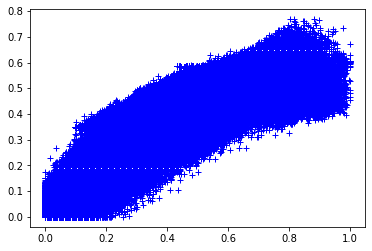

In [65]:
plt.plot(array_2d[:,0],array_2d[:,1],'b+')

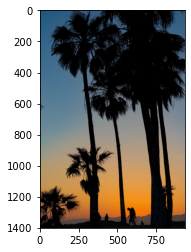

In [66]:
plt.figure()
plt.imshow(array)

In [67]:


    def kMeansInitCentroids(array_2d, K):
    
        row, col = array_2d.shape
    
        centroids = np.zeros((K,col))
        
        for i in range(K):
    
            randidx = np.random.randint(0,row+1)
    
            centroids[i] = array_2d[randidx,:]
    
        return centroids

In [68]:




    def findClosestCentroids(array_2d, centroids):
    
        row1,col1 = centroids.shape
    
        K = row1
    
        dist = np.zeros((row1,1))
    
    
        row2,col2 = array_2d.shape
    
        idx = np.zeros((row2,1))
    
        for i in range(row2):
            for j in range(K):
                dist[j] = np.sum((array_2d[i]-centroids[j])*(array_2d[i]-centroids[j]))
            element = min(dist)
            
            for k in range(K):
                if element == dist[k]:
                    idx[i]=k
                    break;
        
        idx = idx.astype(int)
                
        return idx
    
    # here the data point is rgb here there are height*width training examples
    # each example has rgb so we get three dimensional plot we have to cluster these rgb for each training example

In [69]:
def computeCentroids(array_2d,idx,K):
    
    row1, col1 = array_2d.shape
    
    centroids = np.zeros((K,col1))
    
    totalsum = np.zeros((K,col1))
    
    count = np.zeros(K)
    
    for i in range(idx.shape[0]):
        idx[i] = int(idx[i])
        totalsum[idx[i],:] = totalsum[idx[i],:]+array_2d[i,:]
        count[idx[i]] = count[idx[i]]+1
    for k in range(1,K):
        if count[k]==0:
            count[k]=1
        
        centroids[k,:] = totalsum[k,:]/count[k]
        
    return centroids

In [70]:
def runkMeans(array_2d, initial_centroids, max_iters):
    
    row,column = array_2d.shape
    
    K = initial_centroids.shape[0]
    
    centroids = initial_centroids
    
    idx = np.zeros((row,1))
    
    for i in range(max_iters):
        
        idx = findClosestCentroids(array_2d, centroids)
        
        centroids = computeCentroids(array_2d, idx, K)
    
    return centroids

In [71]:
K = int(input('Enter number of clusters to compress the image: '))

Enter number of clusters to compress the image: 10


In [72]:
max_iters = int(input('Enter number of iterations to move the centroids: '))

Enter number of iterations to move the centroids: 10


In [73]:
initial_centroids = kMeansInitCentroids(array_2d, K)

In [74]:
centroids = runkMeans(array_2d,initial_centroids,max_iters)

In [75]:
#centroids = kMeansInitCentroids(image_as_array2d,5)

In [76]:
#centroids

In [77]:
#close = findClosestCentroids(image_as_array2d, centroids)

In [78]:
#close

In [79]:
#dis = np.zeros((2,1))

In [80]:
#dis

In [81]:
idx = findClosestCentroids(array_2d,centroids)

In [82]:
X_recovered = centroids[idx,:]

In [83]:
X_recovered = X_recovered.reshape((h,w,c))

In [84]:
X_recovered.shape

(1401, 934, 3)

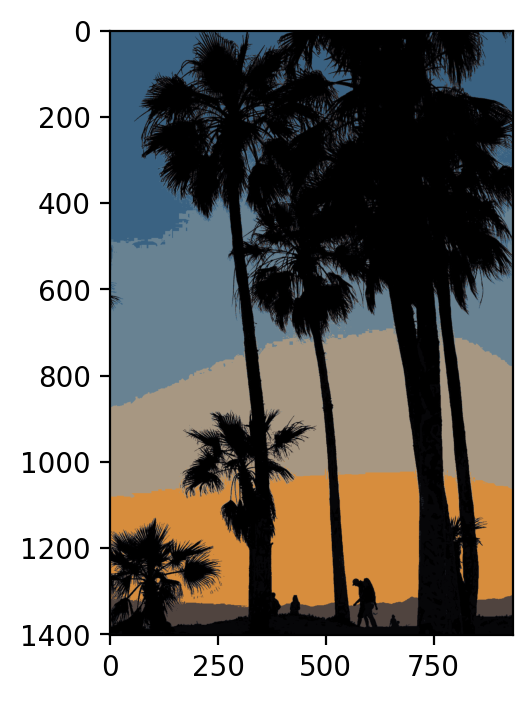

In [85]:
plt.figure(dpi=200)
plt.imshow(X_recovered)